In [1]:
import numpy as np
import pandas as pd
import pandas.io.sql as sqlio
import psycopg2 as ps
import matplotlib.pyplot as plt

In [2]:
conn = ps.connect (dbname= "northwind",
                   user="postgres",
                   password="Password.",
                   port="5432" 
                  )

#  STOK ANALİZİ

### 1.Ürünlerin mevcut stok miktarları ile yeniden sipariş seviyelerini inceleme

In [3]:
sql = """
SELECT 
    product_name,
    unit_in_stock AS "Mevcut Stok",
    unit_on_order AS "Sipariş Miktarı",
    reorder_level AS "Yeniden Sipariş Seviyesi",
    CASE 
        WHEN unit_in_stock <= reorder_level THEN 'Yeniden Sipariş Edilmeli'
        ELSE 'Stok Seviyesi Yeterli'
    END AS "Stok Durumu"
FROM 
    products
ORDER BY 5;
"""

In [4]:
df = sqlio.read_sql_query(sql, conn)
df.head()

C:\Users\Emrah\AppData\Local\Temp\ipykernel_5128\2184680693.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = sqlio.read_sql_query(sql, conn)


,product_name,Mevcut Stok,Sipariş Miktarı,Yeniden Sipariş Seviyesi,Stok Durumu
0,Teatime Chocolate Biscuits,25,0,5,Stok Seviyesi Yeterli
1,Zaanse koeken,36,0,0,Stok Seviyesi Yeterli
2,Valkoinen suklaa,65,0,30,Stok Seviyesi Yeterli
3,Manjimup Dried Apples,20,0,10,Stok Seviyesi Yeterli
4,Filo Mix,38,0,25,Stok Seviyesi Yeterli


In [5]:
df.shape

(77, 5)

In [6]:
df.info

<bound method DataFrame.info of                   product_name  Mevcut Stok  Sipariş Miktarı  \
0   Teatime Chocolate Biscuits           25                0   
1                Zaanse koeken           36                0   
2             Valkoinen suklaa           65                0   
3        Manjimup Dried Apples           20                0   
4                     Filo Mix           38                0   
..                         ...          ...              ...   
72                   Chocolade           15               70   
73                  Gravad lax           11               50   
74         Sir Rodney's Scones            3               40   
75                    Maxilaku           10               60   
76               Outback Lager           15               10   

    Yeniden Sipariş Seviyesi               Stok Durumu  
0                          5     Stok Seviyesi Yeterli  
1                          0     Stok Seviyesi Yeterli  
2                         30

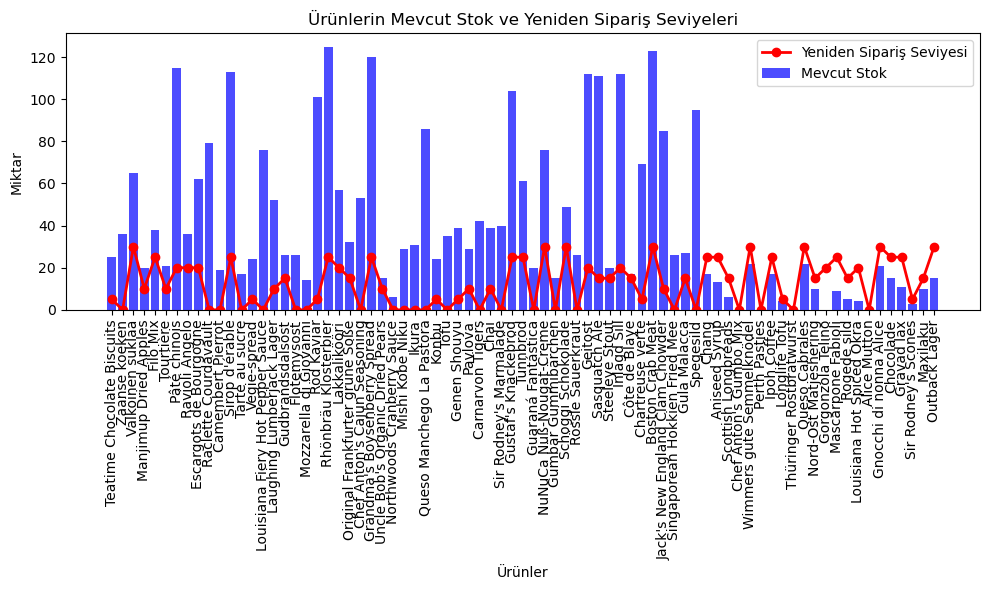

In [7]:
product_names = df['product_name']
current_stock = df['Mevcut Stok']
reorder_level = df['Yeniden Sipariş Seviyesi']

plt.figure(figsize=(10, 6))
plt.bar(product_names, current_stock, color='blue', alpha=0.7, label='Mevcut Stok')
plt.plot(product_names, reorder_level, color='red', marker='o', linestyle='-', linewidth=2, label='Yeniden Sipariş Seviyesi')

plt.xlabel('Ürünler')
plt.ylabel('Miktar')
plt.title('Ürünlerin Mevcut Stok ve Yeniden Sipariş Seviyeleri')
plt.xticks(rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

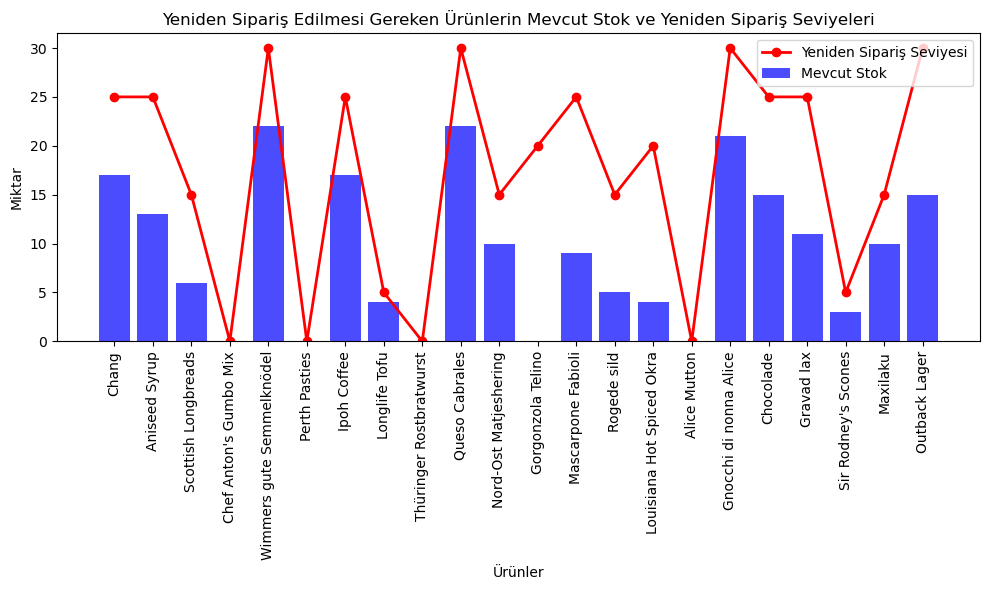

In [8]:
reorder_required_df = df[df['Stok Durumu'] == 'Yeniden Sipariş Edilmeli']

product_names = reorder_required_df['product_name']
current_stock = reorder_required_df['Mevcut Stok']
reorder_level = reorder_required_df['Yeniden Sipariş Seviyesi']

plt.figure(figsize=(10, 6))
plt.bar(product_names, current_stock, color='blue', alpha=0.7, label='Mevcut Stok')
plt.plot(product_names, reorder_level, color='red', marker='o', linestyle='-', linewidth=2, label='Yeniden Sipariş Seviyesi')

plt.xlabel('Ürünler')
plt.ylabel('Miktar')
plt.title('Yeniden Sipariş Edilmesi Gereken Ürünlerin Mevcut Stok ve Yeniden Sipariş Seviyeleri')
plt.xticks(rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

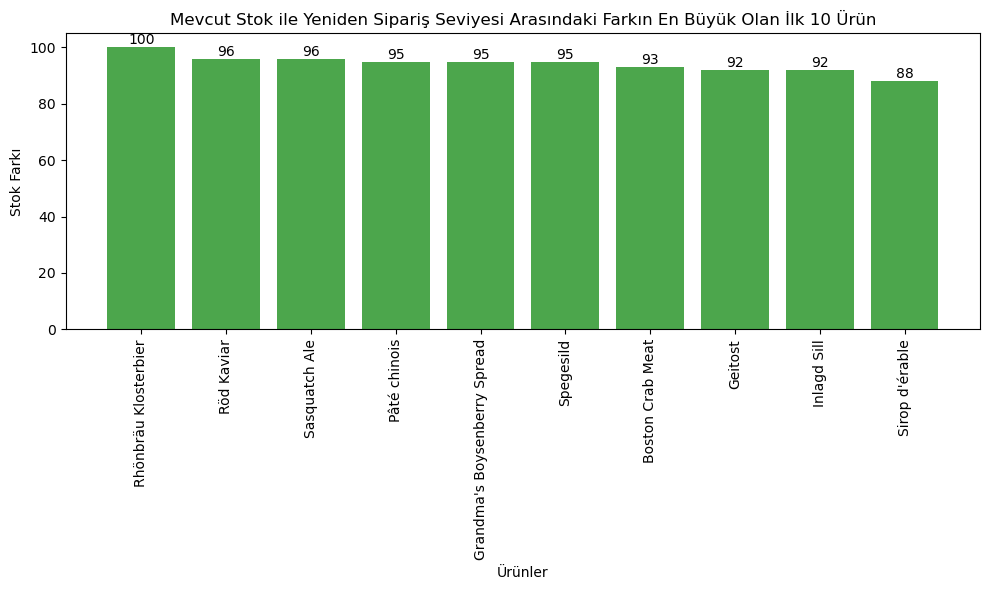

In [9]:
df['Fark'] = df['Mevcut Stok'] - df['Yeniden Sipariş Seviyesi']

top_10_diff = df.nlargest(10, 'Fark')

product_names = top_10_diff['product_name']
difference = top_10_diff['Fark']

plt.figure(figsize=(10, 6))
bars = plt.bar(product_names, difference, color='green', alpha=0.7)

for bar, diff in zip(bars, difference):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(diff), ha='center', va='bottom')

plt.xlabel('Ürünler')
plt.ylabel('Stok Farkı')
plt.title('Mevcut Stok ile Yeniden Sipariş Seviyesi Arasındaki Farkın En Büyük Olan İlk 10 Ürün')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

### 2.Ürün Kategorilerinin Toplam Stok Maaliyeti

In [10]:
sql = """
SELECT 
    c.category_name AS "Kategori",
    CAST(SUM(p.unit_price * p.unit_in_stock) AS NUMERIC (10,2)) AS "Toplam Maliyet"
FROM 
    products p
INNER JOIN 
    categories c ON p.category_id = c.category_id
GROUP BY 
    1
ORDER BY
    2 DESC;
"""

In [11]:
df = sqlio.read_sql_query(sql, conn)
df.head()

C:\Users\Emrah\AppData\Local\Temp\ipykernel_5128\2184680693.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = sqlio.read_sql_query(sql, conn)


,Kategori,Toplam Maliyet
0,Seafood,13010.35
1,Beverages,12480.25
2,Condiments,11926.05
3,Dairy Products,11271.20
4,Confections,10392.20


In [12]:
df.info

<bound method DataFrame.info of          Kategori  Toplam Maliyet
0         Seafood        13010.35
1       Beverages        12480.25
2      Condiments        11926.05
3  Dairy Products        11271.20
4     Confections        10392.20
5    Meat/Poultry         5729.45
6  Grains/Cereals         5594.50
7         Produce         3549.35>

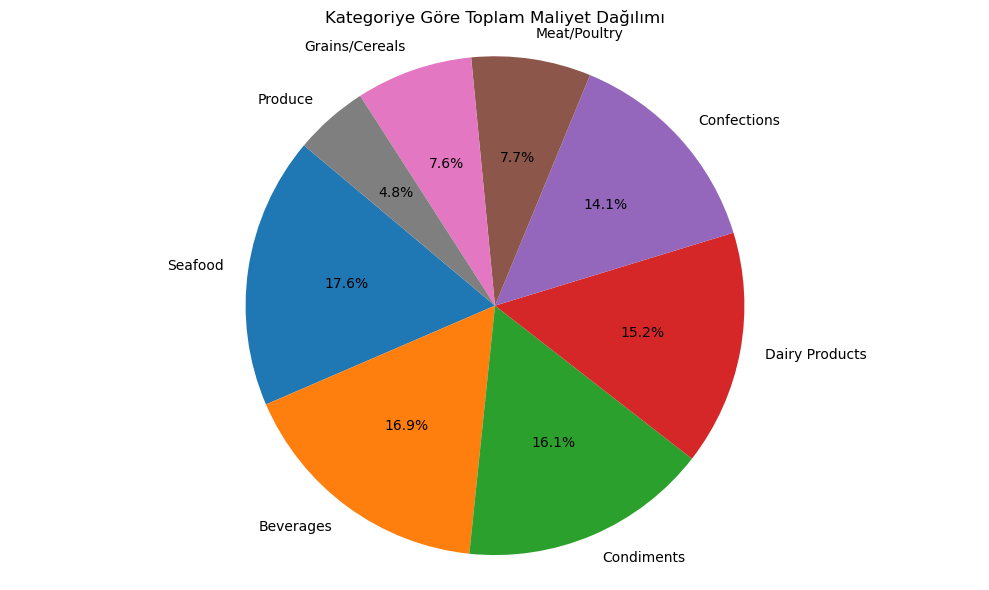

In [13]:
labels = df['Kategori']
costs = df['Toplam Maliyet']

# Pasta grafiği oluşturma
plt.figure(figsize=(10, 6))
plt.pie(costs, labels=labels, autopct='%1.1f%%', startangle=140)

# Başlık ayarları
plt.title('Kategoriye Göre Toplam Maliyet Dağılımı')

# Grafiği gösterme
plt.axis('equal')
plt.tight_layout()
plt.show()

#  LOJİSTİK ANALİZ

### 1. Nakliye Şirketlerinin Toplam Sipariş Sayıları

In [14]:
sql = """
SELECT s.company_name AS "Nakliye Şirketi", COUNT(o.order_id) AS "Sipariş Sayısı"
FROM orders o
JOIN shippers s ON o.ship_via = s.shipper_id
GROUP BY 1
ORDER BY 2 DESC;
"""

In [15]:
df = sqlio.read_sql_query(sql, conn)
df.head()

C:\Users\Emrah\AppData\Local\Temp\ipykernel_5128\2184680693.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = sqlio.read_sql_query(sql, conn)


,Nakliye Şirketi,Sipariş Sayısı
0,United Package,326
1,Federal Shipping,255
2,Speedy Express,249


In [16]:
df.info

<bound method DataFrame.info of     Nakliye Şirketi  Sipariş Sayısı
0    United Package             326
1  Federal Shipping             255
2    Speedy Express             249>

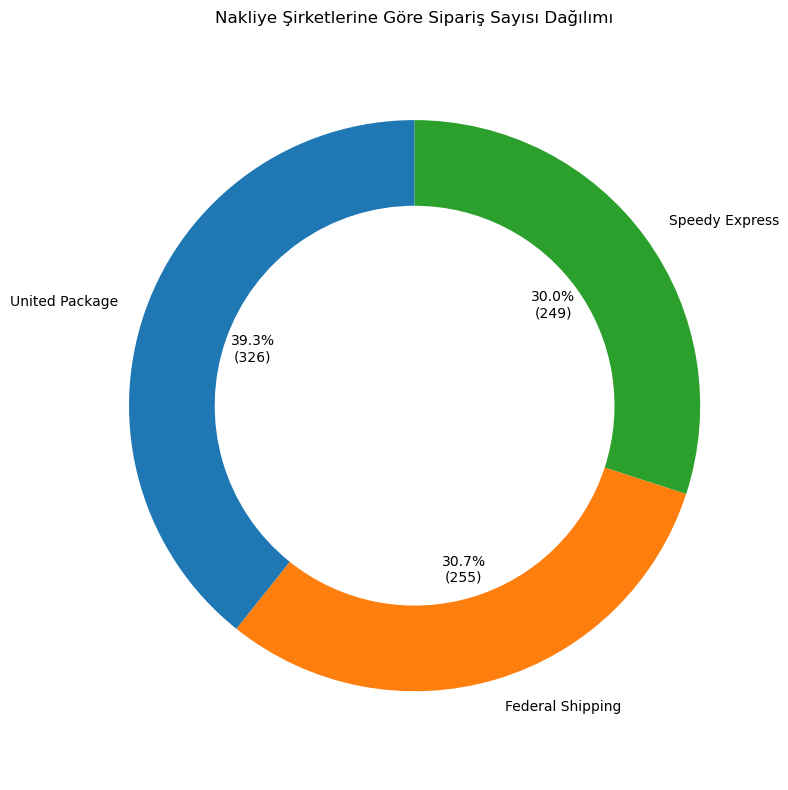

In [17]:
labels = df['Nakliye Şirketi']
sizes = df['Sipariş Sayısı']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct=lambda pct: f"{pct:.1f}%\n({int(pct / 100 * sum(sizes))})", startangle=90, wedgeprops=dict(width=0.3))

plt.title('Nakliye Şirketlerine Göre Sipariş Sayısı Dağılımı')

plt.axis('equal')

plt.tight_layout()
plt.show()

### 2. Siparişi Geciken Ürünlerin Nakliye Şirketleri

In [18]:
sql = """
SELECT s.company_name AS "Nakliye Şirketi",
       p.product_name AS "Ürün Adı",
       (o.shipped_date - o.required_date) AS "Gecikme Süresi"
FROM orders o
JOIN shippers s ON o.ship_via = s.shipper_id
JOIN order_details od ON o.order_id = od.order_id
JOIN products p ON od.product_id = p.product_id
WHERE o.shipped_date > o.required_date
ORDER BY 3 DESC;
"""


In [19]:
df = sqlio.read_sql_query(sql, conn)
df.head()

C:\Users\Emrah\AppData\Local\Temp\ipykernel_5128\2184680693.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = sqlio.read_sql_query(sql, conn)


,Nakliye Şirketi,Ürün Adı,Gecikme Süresi
0,United Package,Singaporean Hokkien Fried Mee,23
1,Federal Shipping,Gorgonzola Telino,18
2,Federal Shipping,Raclette Courdavault,18
3,Speedy Express,Queso Cabrales,18
4,Speedy Express,Chef Anton's Cajun Seasoning,18


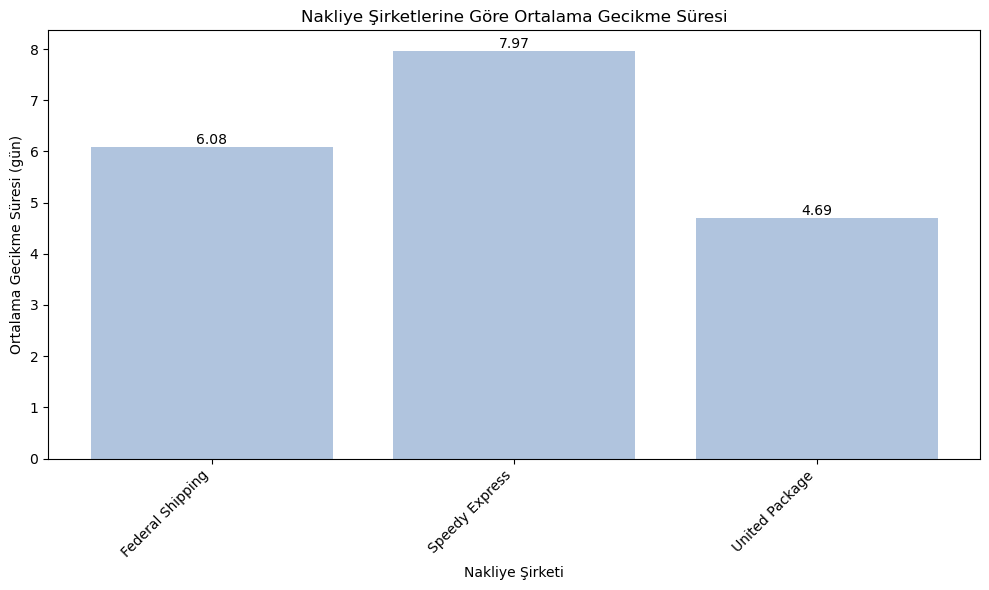

In [21]:
avg_delay = df.groupby('Nakliye Şirketi')['Gecikme Süresi'].mean().reset_index()

plt.figure(figsize=(10, 6))
bars = plt.bar(avg_delay['Nakliye Şirketi'], avg_delay['Gecikme Süresi'], color='lightsteelblue')

plt.xlabel('Nakliye Şirketi')
plt.ylabel('Ortalama Gecikme Süresi (gün)')
plt.title('Nakliye Şirketlerine Göre Ortalama Gecikme Süresi')

plt.xticks(rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()
